In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Is a point on the right or left side of a line defined by AB?

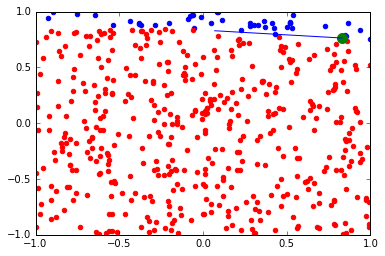

Points on the left:  457
Points on the right:  43


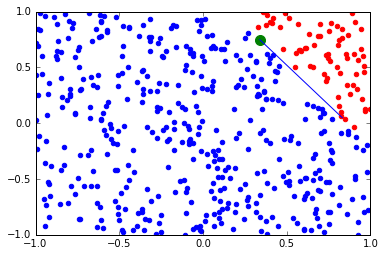

Points on the left:  69
Points on the right:  431


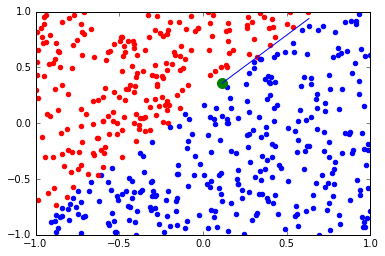

Points on the left:  213
Points on the right:  287


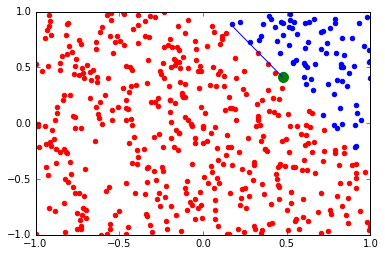

Points on the left:  422
Points on the right:  78


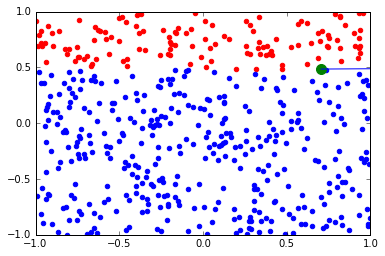

Points on the left:  128
Points on the right:  372


In [67]:
def find_theta(pt):
    """
    Given an (x,y) coordinate in R^2, determine the angle between the
    positive x-axis and the vector defined by the point.
    
    Ensure that values are between 0 and 2pi.
    """
    theta = np.arccos(pt[0])
    if pt[1] < 0:
        theta = 2*np.pi - theta
    
    return theta

def findside(A,B,p):
    """
    Determine whether the point p is on the left side or the right side
    of the line determined by A and B.
    
    Method:
        1. Subtract A from B and p to shift the system to the origin.
        2. Determine the angles between AB and the positive x-axis, and
           between p and the positive x-axis. 
        3. Subtract theta_AB from theta_p and adjust to make sure the result
           is between 0 and 2pi.
        4. The problem has now been reduced to finding whether the angle is
           in [0,pi] or [pi,2pi], which is accomplished with a simple call
           to np.floor
    
    Returns
    -------
    0 if the point is on the left side of the line, 1 if on the right
    """
    
    theta_AB = find_theta((B-A)/np.linalg.norm(B-A))
    theta_p = find_theta((p-A)/np.linalg.norm(p-A))
    
    diff = theta_p - theta_AB
    if diff < 0:
        diff += 2*np.pi
    return np.floor(diff/np.pi)
      
def test_leftright():
    A = np.random.uniform(0,1,2)
    B = np.random.uniform(0,1,2)
    
    plt.plot([A[0],B[0]],[A[1],B[1]])
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    
    numleft = 0
    numright = 0
    pts = np.zeros((2,500))
    for j in xrange(500):
        
        pt = np.random.uniform(-1,1,2)
        pts[:,j] = pt
        
        side = findside(A,B,pt)
        if side == 0:
            # Left
            numleft += 1
            plt.scatter(pt[0],pt[1],color='r')
        else:
            # Right
            numright += 1
            plt.scatter(pt[0],pt[1],color='b')
            
    plt.scatter(A[0],A[1],s=100,color='g')
    plt.show()
    
    print "Points on the left: ", numleft
    print "Points on the right: ", numright
    
def test_near(eps):
    print "\nEpsilon = ", eps
    
    A = np.random.uniform(-1,1,2)
    B = np.random.uniform(-1,1,2)
    
    plt.plot([A[0],B[0]],[A[1],B[1]])
    plt.xlim([A[0]-2*eps,A[0]+2*eps])
    plt.ylim([A[1]-2*eps,A[1]+2*eps])
    
    numleft = 0
    numright = 0
    pts = np.zeros((2,500))
    for j in xrange(500):
        pt = np.zeros(2)
        pt[0] = np.random.uniform(A[0]-2*eps,A[0]+2*eps)
        pt[1] = np.random.uniform(A[1]-2*eps,A[1]+2*eps)
        pts[:,j] = pt
        
        side = findside(A,B,pt)
        if side == 0:
            # Left
            numleft += 1
            plt.scatter(pt[0],pt[1],color='r')
        else:
            # Right
            numright += 1
            plt.scatter(pt[0],pt[1],color='b')
            
    plt.scatter(A[0],A[1],s=100,color='g')
    plt.show()
    
    print "Points on the left: ", numleft
    print "Points on the right: ", numright


for i in xrange(5):
    test_leftright()
# Since machine epsilon for numpy float32 is about 10^-16, we test machine
# epsilon for 10^-i from 0 to 16
#for i in xrange(17):
#    test_near(1.0/10**i)

Given three points A, B, and C in $\mathbb{R}^3$

(1) Rigorously define the triangle defined by A, B, and C

(2) Define the "negative triangle" (void in 2D case)

(3) What makes the answers different between (1) and (2)

(4) What if we have more than three points?

If we simply want to explicitly define the set of points in the triangle,
we take the union of the line segments AB, BC, and CB, that is,

$\{tA + (1-t)B : t\in (0,1)\} \cup \{tB + (1-t)C:t\in (0,1)\}\cup \{tA + (1-t)C:t\in (0,1)\}$

A similar result holds for the points defining a generic polygon, except in 
this case we need to know which of the possible line segments between the points
are included in the polygon.

The problem of determining whether an arbitrary point is on the triangle is
more difficult. 

determine if on one of the line segments, so for each line segment, check if
on segment
    first check if the projection onto the line is equal to the actual thing,
    then if the line is AB, you want norm(p-A) less than the norm of (B-A)
    i think

To get interior of the triangle, I think you want c0, c1, and c2 nonnegative
and summing to one, and you do $c_0A + c_1B + c_2C$? So it's parametrized by the surface of the 3d simplex. But you want the interior, so each one is in (0,1)

To determine if it's in the interior of the triangle, can you do an affine
transformation from the 3d simplex?

In [ ]:
Notes on checking whether you're on the interior:

If everything is on the left, then you're on the inside
If everything is on the right, then you're on the outside

If you're NOT, then for each weird thing, you have to check whether the segment
is actually affecting that point (since left/right is considering infinite lines)

Green's thm stuff: #21 from chapter 16.5 in 314 textbook'

check the local points? like, check which points are the closest in both x and y
directions, see what happens